In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('weight-height.csv')

In [12]:
df

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]

In [13]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [14]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

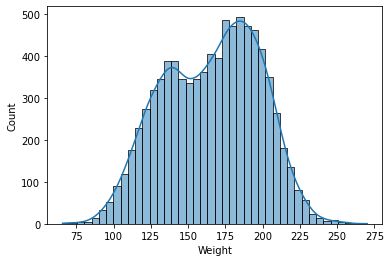

In [15]:
sns.histplot(df["Weight"], kde=True)

In [16]:
mean_value = df['Weight'].mean()

In [17]:
mean_value

165.63273532667586

In [18]:
std_value = df['Weight'].std()

In [19]:
std_value

32.04392221721549

In [20]:
std_3 = mean_value+(2.5*std_value)
std_3

245.74254086971456

In [21]:
neg_std_3 = mean_value - (2.5*std_value)
neg_std_3

85.52292978363714

In [22]:
df[df['Weight'] > std_3]

Gender     Height      Weight
994    Male  78.095867  255.690835
1506   Male  75.698618  249.565628
1610   Male  76.617546  255.863326
1750   Male  74.604668  249.946283
1896   Male  76.472880  246.232321
2014   Male  78.998742  269.989698
2070   Male  77.465569  252.556689
2971   Male  75.156879  250.317151
3228   Male  76.268668  247.386741
3285   Male  78.528210  253.889004
3669   Male  77.008336  251.425050
3909   Male  77.067355  249.110242
4077   Male  74.976953  248.848873
4331   Male  76.848761  254.209073

In [23]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]

In [24]:
merge.shape

(27, 3)

In [25]:
remove_out_columns = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)]

In [26]:
remove_out_columns.shape

(8528, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

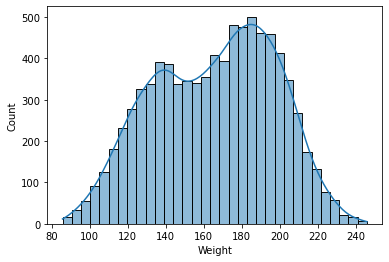

In [27]:
sns.histplot(remove_out_columns['Weight'], kde=True)

# One hot Encoding

In [28]:
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first= True)

In [29]:
dummy_variables

Male
0        1
1        1
2        1
3        1
4        1
...    ...
8550     0
8551     0
8552     0
8553     0
8554     0

[8528 rows x 1 columns]

In [30]:
new_df = remove_out_columns.drop('Gender', axis=1)

In [31]:
new_df

Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
8550  60.483946  110.565497
8551  63.423372  129.921671
8552  65.584057  155.942671
8553  67.429971  151.678405
8554  60.921791  131.253738

[8528 rows x 2 columns]

In [32]:
df= pd.concat([new_df,dummy_variables],axis=1)

In [33]:
df

Height      Weight  Male
0     73.847017  241.893563     1
1     68.781904  162.310473     1
2     74.110105  212.740856     1
3     71.730978  220.042470     1
4     69.881796  206.349801     1
...         ...         ...   ...
8550  60.483946  110.565497     0
8551  63.423372  129.921671     0
8552  65.584057  155.942671     0
8553  67.429971  151.678405     0
8554  60.921791  131.253738     0

[8528 rows x 3 columns]

In [34]:
x = df.drop('Height',axis=1)

In [35]:
x

Weight  Male
0     241.893563     1
1     162.310473     1
2     212.740856     1
3     220.042470     1
4     206.349801     1
...          ...   ...
8550  110.565497     0
8551  129.921671     0
8552  155.942671     0
8553  151.678405     0
8554  131.253738     0

[8528 rows x 2 columns]

In [36]:
y=df['Height']

In [37]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
8550    60.483946
8551    63.423372
8552    65.584057
8553    67.429971
8554    60.921791
Name: Height, Length: 8528, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [40]:
xtrain.shape

(5969, 2)

In [41]:
xtest.shape

(2559, 2)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lre = LinearRegression()

In [44]:
lre.fit(xtrain,ytrain)

LinearRegression()

In [45]:
lre.coef_

array([ 0.12368722, -0.99863883])

In [46]:
lre.intercept_

46.920637885849125

In [47]:
lre.predict(xtest)

array([66.21313293, 61.53372733, 63.47981906, ..., 70.37833922,
       69.94908919, 69.10116118])

In [48]:
lre.score(xtest,ytest)

0.8535161062270603

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
pred = lre.predict(xtest)

In [51]:
mean_squared_error(ytest,pred)

2.0824049723793894

In [52]:
r2_score(ytest,pred)

0.8535161062270603

# KNN ALGORITHM

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn = KNeighborsRegressor(n_neighbors=100)

In [55]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [56]:
pred2 = knn.predict(xtest)

In [57]:
mean_squared_error(ytest,pred2)

2.1611233963757344

In [58]:

r2_score(ytest,pred2)

0.8479787677114505